##### Made by Ihor Markevych

-------
**_Comments:_**
1. Notebook is divided into two parts. They are marked with green headers.  
First is for sportsman recommendation, second one is for country recommendation.
   * Data Exploration and Recommendations are also divided into two parts, one for sport, second for sportsman.
2. Rubric items names are in red.
3. Text that explains code is in _italic_.
4. Text that explains data/results is usual.
5. Some sub-rubrics are bold.
6. Some important aspects that should be stressed are bold.
7. For "two seconds" match finding there is a clickable structure below, as the whole notebook is quite long.


----------

#### Structure 
(clickable)   

1. [Objective of the Proposed Research](#objective)
2. [Sportsman Selection](#sportsman)
    * [Data Exploration](#sportsman)
    * [Plots](#sportsman_plot)
    * [Recommendations](#sportsman_recommendations)
    
3. [Sport Selection](#sport)    
    * [Data Exploration](#sport)
    * [Recommendations](#sport_recommendations)
4. [Summary](#summary)    

# Best sportsman and sport recommendations for Kellog
## Sponsorship recommendational analysis


### Data: [120 years of Olympic history: athletes and results](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results)

#### basic bio data on athletes and medal results from Athens 1896 to Rio 2016



------------------
------------------


<a id='objective'></a>
## <span style="color:red"> Objective of the Proposed Research: </span>

We have a histrocical dataset with data about Olympic games and participants. Based on this dataset we should provide recommendations for best sport and sportsmen. We'll do some general investigations, such as percentage of participants, who got medals, their age and body metrics density, total quantity of medals.  
   
   
For sportsman we'll firstly investigate data, firstly checking for dependencies between males and females success. We'll be looking for dependencies between age and sport success (medals), and between body metrics, such as height and weight (converted into body mass index to be more representative). We'll get such values, as max and min, and also mean for body metrics to understand usual body constitution of male and female participants. Next, we'll assign some points (weights) to each type of medal (Gold, Silver, Bronze) and evaluate general score for each sportsmen. Based on this score we'll find the most succesfull sportsman (or sportsmen) and check his body metrics and age, whether they are in a statistically good intervals. Also we'll compare this sportsman to other participant and visualize this comparison.
   
     
For sports we'll check for all types of sport that took place at least once in our dataset, then for each of them we'll evaluate popularity, based on how much times this type of sport was hold during all years, how much teams participated in it during this time and how popular this sport was in last century (from 2000). Then we'll select top 10 by each popularity metric and print them to compare. Based on this comparison we'll recommend  the most popular sport to Kellogg.





--------
--------


_installing additional packages (commented, as should be done only once)_

In [1]:
# install.packages('sm')
# install.packages('plyr')

_connecting installed libraries and reading the data from csv file:_

In [2]:
library('sm')
library('plyr')
athletesData <- read.csv('./data/athlete_events.csv')

Warning message:
"package 'sm' was built under R version 3.6.2"Package 'sm', version 2.2-5.6: type help(sm) for summary information
Warning message:
"package 'plyr' was built under R version 3.6.2"

---------------
<a id='sportsman'></a>

# <span style="color:green"> Sportsman Selection: </span>

## <span style="color:red"> Data Exploration: </span>


Let's see **what types of columns** we have.

_`str()` function shows structure of the object, in this case - data frame_

In [3]:
str(athletesData)

'data.frame':	271116 obs. of  15 variables:
 $ ID    : int  1 2 3 4 5 5 5 5 5 5 ...
 $ Name  : Factor w/ 134732 levels "  Gabrielle Marie \"Gabby\" Adcock (White-)",..: 8 9 44318 29412 21470 21470 21470 21470 21470 21470 ...
 $ Sex   : Factor w/ 2 levels "F","M": 2 2 2 2 1 1 1 1 1 1 ...
 $ Age   : int  24 23 24 34 21 21 25 25 27 27 ...
 $ Height: int  180 170 NA NA 185 185 185 185 185 185 ...
 $ Weight: num  80 60 NA NA 82 82 82 82 82 82 ...
 $ Team  : Factor w/ 1184 levels "30. Februar",..: 199 199 273 278 705 705 705 705 705 705 ...
 $ NOC   : Factor w/ 230 levels "AFG","AHO","ALB",..: 42 42 56 56 146 146 146 146 146 146 ...
 $ Games : Factor w/ 51 levels "1896 Summer",..: 38 49 7 2 37 37 39 39 40 40 ...
 $ Year  : int  1992 2012 1920 1900 1988 1988 1992 1992 1994 1994 ...
 $ Season: Factor w/ 2 levels "Summer","Winter": 1 1 1 1 2 2 2 2 2 2 ...
 $ City  : Factor w/ 42 levels "Albertville",..: 6 18 3 27 9 9 1 1 17 17 ...
 $ Sport : Factor w/ 66 levels "Aeronautics",..: 9 33 25 62 54 5

Let's check for **alphabetically first 10 sportsmen**:

_`head(df, X)` function shows first `X` items of `df` object_

In [4]:
head(athletesData, 10)

ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NA
2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NA
3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NA
4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NA
5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NA
5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NA
5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NA
5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NA
5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NA


Next, let's count **how many medals** of each kind were given to different people over those ages.

_`table()` function counts unique items (creates contingency table)_

In [5]:
table(athletesData['Medal']) 


Bronze   Gold Silver 
 13295  13372  13116 

One important thing for us to understand is how many participants have got medals in this dataset.

_here I am using the fact that TRUE is interpreted as 1 and FALSE as 0 to find all nonNA values_

In [6]:
cat(sum(!is.na(athletesData[, 'Medal'])) / length(athletesData[, 'Medal']) * 100, 
    '% of participants from this dataset got medals.')

14.67379 % of participants from this dataset got medals.

This makes this dataset quite representive for our exploration.

### Now let's check whether there is any connection between sex of a spostmen and medals.

_again, using `table()` fuction we can count unique items, in this case for each combination of medal type and sex_

In [7]:
sexMedalTable <- table(athletesData[c('Sex', 'Medal')])

Below we can see how many medals of each kind total have got sportsmen of different sexes.

In [8]:
sexMedalTable

   Medal
Sex Bronze Gold Silver
  F   3771 3747   3735
  M   9524 9625   9381

_below we are just reusing data from previous two cells_

In [9]:
cat('As can be seen, males got',
          round(sum(sexMedalTable[2,]) / sum(sexMedalTable[1,]), digits=3), 
          'times more medals in comparisson to females.\n\n')
cat('To be more specific:\n')

malesVSFemales <- sexMedalTable[2,] / sexMedalTable[1,]

for(x in names(malesVSFemales)){
    cat('For', x, 'medals',
          round(malesVSFemales[x], digits=3), 
          'times.\n')
}

As can be seen, males got 2.535 times more medals in comparisson to females.

To be more specific:
For Bronze medals 2.526 times.
For Gold medals 2.569 times.
For Silver medals 2.512 times.


-----------
Let's show those numbers explicitly.

_subsetting two columns from general dataset_

In [10]:
sexMedalData <- athletesData[c('Sex','Medal')]

_that's a function for showing correct words for sexes instead of one letter_

In [11]:
printSex <- function(sex) {
   if(sex == 'F')
       return('Female')
    else if(sex == 'M')
        return('Male') 
}

_here is second way of counting unique values_

In [12]:
for (sex in unique(sexMedalData[,'Sex'])){
    for (medal in na.omit(unique(sexMedalData[, 'Medal']))){
        cat(printSex(sex), 'participants have got', 
            sum(sexMedalData['Sex'] == sex & 
                (sexMedalData['Medal'] == medal & 
                 !is.na(sexMedalData['Medal']))), 
            medal, 
            'medals.\n')
        cat('\n')
    }
}

Male participants have got 9625 Gold medals.

Male participants have got 9524 Bronze medals.

Male participants have got 9381 Silver medals.

Female participants have got 3747 Gold medals.

Female participants have got 3771 Bronze medals.

Female participants have got 3735 Silver medals.



But what if we check **frequency of participation of females vs males**?

_we are using `table()` to calculate times of participations of sportsmen of different sexes_

In [13]:
table(athletesData['Sex'])[[2]] / table(athletesData['Sex'])[[1]]

[1] 2.638067

This explains amazing difference in winning rate, as men and women in most of the sports do not compete against each other.   
So, we can't say that men win more frequently than women and our recommendation should not be based on sex.

--------------
Let's now check for **weight and height distribution**, separatly for men and women.   
   

Firstly, let's see general info about weight, e.g. min and max value and median.

_`summary()` is used for getting such data, as quantiles and min and max_

In [14]:
summary(athletesData[,'Weight'])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   25.0    60.0    70.0    70.7    79.0   214.0   62875 

Now, let's see same info about heights of the sportsmen.

_`summary()` is used for getting such data, as quantiles and min and max_

In [15]:
summary(athletesData[,'Height'])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  127.0   168.0   175.0   175.3   183.0   226.0   60171 

As can be seen, **most of the sportsmen were between 60 and 79 kg and between 1,68 and 1,83 meters**, so, if Kellogg will be sponsoring some kind of merchandise (e.g. T-shirts), most of them should be for those body measurments.

_function for creation of Body Mass Index column_

In [16]:
createBMI <- function(df){
    df['Body Mass Index'] <- df['Weight'] / (df['Height'] / 100) ** 2
    return(df)
}

_here I am subsetting only the data that I'll need for this section_

In [17]:
measurmentsData <- na.omit(athletesData[!duplicated(athletesData[,'ID']),][c('Height', 'Weight','Sex')])
measurmentsData <- createBMI(measurmentsData)

_separating data by sexes_

In [18]:
malesData <- measurmentsData[measurmentsData['Sex']=='M',][c('Height', 'Weight', 'Body Mass Index')]
femalesData <- measurmentsData[measurmentsData['Sex']=='F',][c('Height', 'Weight', 'Body Mass Index')]

Below we can find some useful **statistical data about male participants body metrics**:

In [19]:
summary(malesData)

     Height          Weight      Body Mass Index 
 Min.   :127.0   Min.   : 28.0   Min.   : 8.361  
 1st Qu.:173.0   1st Qu.: 68.0   1st Qu.:21.798  
 Median :180.0   Median : 75.0   Median :23.307  
 Mean   :179.5   Mean   : 76.5   Mean   :23.620  
 3rd Qu.:185.0   3rd Qu.: 84.0   3rd Qu.:24.931  
 Max.   :226.0   Max.   :214.0   Max.   :63.902  

And same **for female**:

In [20]:
summary(femalesData)

     Height        Weight       Body Mass Index
 Min.   :127   Min.   : 25.00   Min.   :10.50  
 1st Qu.:163   1st Qu.: 55.00   1st Qu.:19.81  
 Median :169   Median : 60.00   Median :21.15  
 Mean   :169   Mean   : 61.28   Mean   :21.37  
 3rd Qu.:174   3rd Qu.: 67.00   3rd Qu.:22.63  
 Max.   :213   Max.   :167.00   Max.   :51.79  

<a id='sportsman_plot'></a>

### <span style="color:red"> Plots: </span>   

_in next cell I have created a function for plotting densities of several vectors on the same chart_   

_interesting problem was when max y values of a first dataframe in a list was lower then max y value of bext datasets_
_this was leading to cutting top of graph, therefore I am searching for highest y value and plot dataframe with that value firstly_

_then I use this function to plot densities (frequencies) of body measurments atht I already have subsetted earlier_

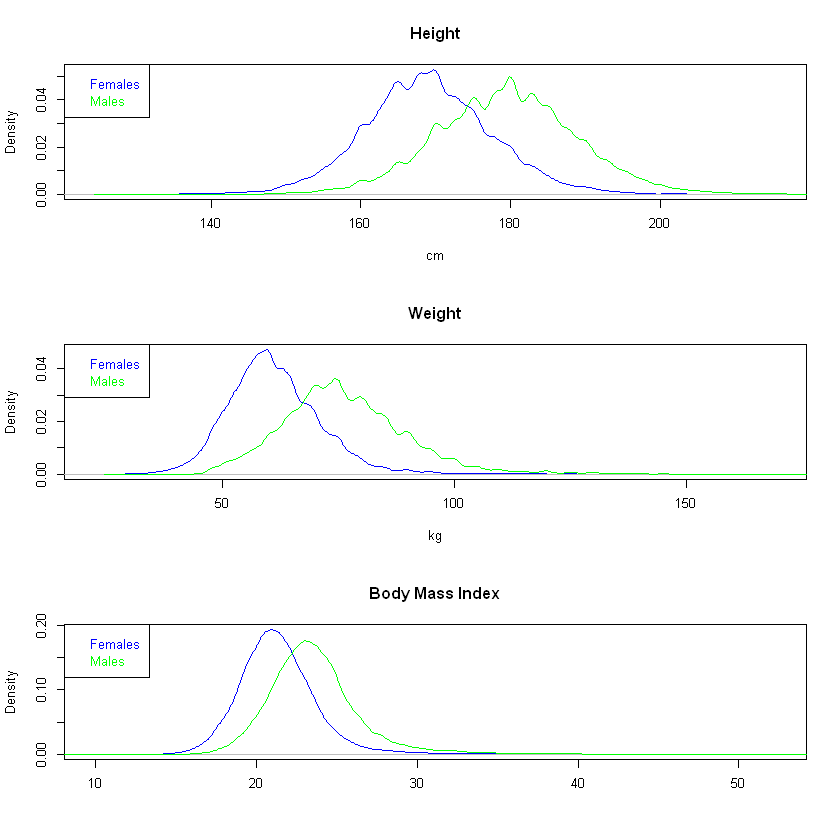

In [21]:
#inspired by https://www.statmethods.net/graphs/density.html

plotDensities <- function(dfs, column, main=column, custom.legend, 
                          colors=c('blue', 'green','red'), 
                          xlabel='', position='topleft'){
    maxs <- c()
    for(df in dfs){
        maxs <- c(maxs, density(df[[column]])$y[which.max(density(df[[column]])$y)])
    }
    plot(density(dfs[[which.max(maxs)]][[column]]), main=main, col=colors[which.max(maxs)], xlab=xlabel)
    for(i in setdiff(1:length(dfs), which.max(maxs))){
        lines(density(dfs[[i]][[column]])$x, density(dfs[[i]][[column]])$y, col=colors[i])
    }
    legend(x=position, legend=custom.legend, text.col=colors)  
}

par(mfrow=c(3,1))
for(i in names(femalesData)){
    if(i == 'Height'){
        xlabel = 'cm'
    } else if(i == 'Weight') {
        xlabel = 'kg'
    } else {
        xlabel = ''
    }
    plotDensities(list(femalesData, malesData), i, xlabel=xlabel, custom.legend=c('Females', 'Males'))
}

As it can be seen, most of female sportsmen are slimmer. Which is explained naturally, of course.

-------------

And now, let's check **which bodytype sportsmen got more medals**.

_here I do quite similar subsetting as in previous part, only now I also add medals to the data_

In [22]:
malesDataWithMedals <- na.omit(athletesData[athletesData['Sex']=='M',][c('Height', 'Weight', "Medal")])
femalesDataWithMedals <- na.omit(athletesData[measurmentsData['Sex']=='F',][c('Height', 'Weight', "Medal")])
malesDataWithMedals <- createBMI(malesDataWithMedals)
femalesDataWithMedals <- createBMI(femalesDataWithMedals)

_in next cell I have used my custom plotting function to plot charts of body measurments for each sex for each medal_
_I also have created a small function to subset a sportsmen with some kind of a medal_

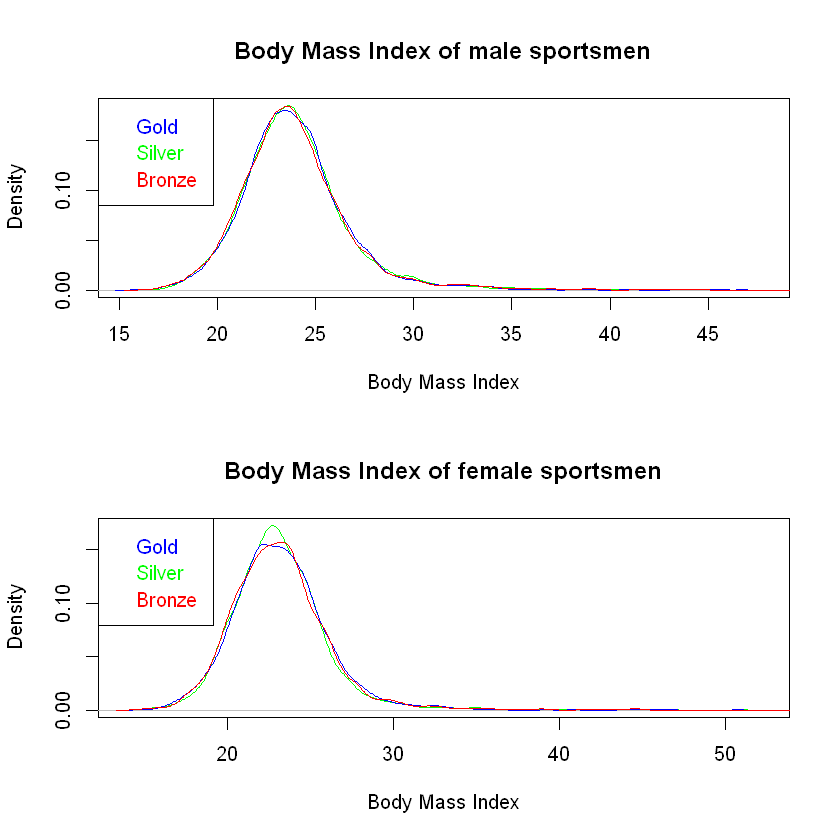

In [23]:
selectMedal <- function(df, medal){
    return(df[df['Medal'] == medal,])
}

par(mfrow=c(2,1))
plotDensities(dfs=list(selectMedal(malesDataWithMedals, 'Gold'),
                       selectMedal(malesDataWithMedals, 'Silver'), 
                       selectMedal(malesDataWithMedals, 'Bronze')), 
             column='Body Mass Index',
             custom.legend=c('Gold','Silver','Bronze'),
             main='Body Mass Index of male sportsmen',
             xlabel='Body Mass Index')

plotDensities(dfs=list(selectMedal(femalesDataWithMedals, 'Gold'),
                       selectMedal(femalesDataWithMedals, 'Silver'), 
                       selectMedal(femalesDataWithMedals, 'Bronze')), 
             column='Body Mass Index',
             custom.legend=c('Gold','Silver','Bronze'),
             main='Body Mass Index of female sportsmen',
             xlabel='Body Mass Index')

Looks like there is no noticable difference between body types of gold, silver and bronze medalists of both sexes. But most of the medalists were between 18-27 BMI. Let's keep this in mind.

-------------------

One more data aspect that will be interesting to know is **age density**. Let's find it out:

Let's find out age for most of the sportsmen:

In [24]:
summary(athletesData[,'Age'])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  10.00   21.00   24.00   25.56   28.00   97.00    9474 

While there are some surprising min and max values (we'll look closer at them later), most of the sporstmen are around 25. Let's investigate, if we can base our recommendation on age:

_quite same, as in a cells before, reusing custom plotting function._

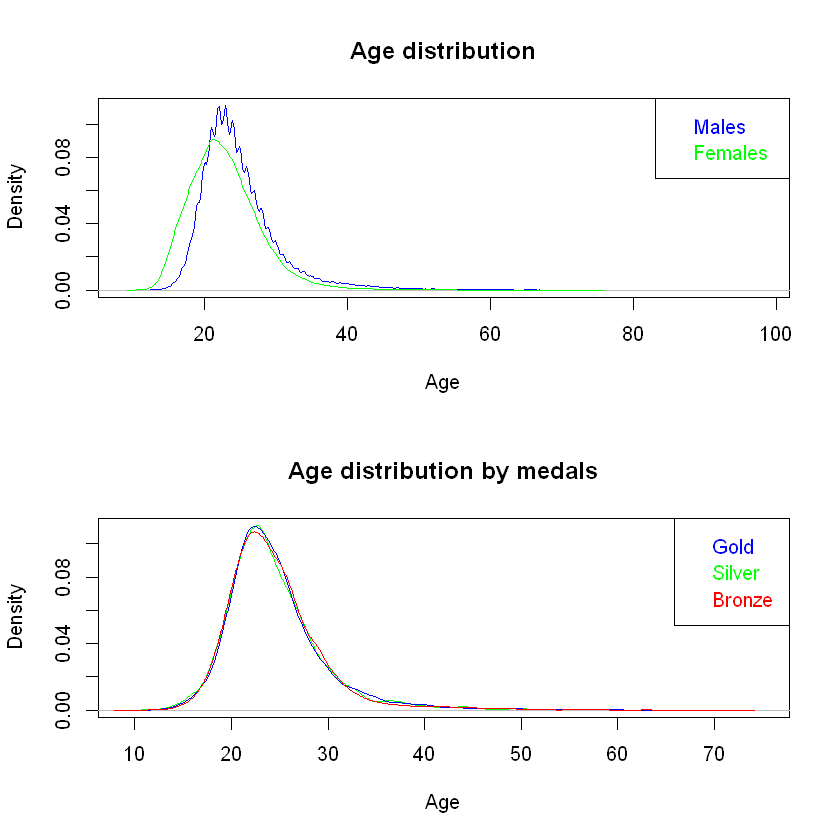

In [25]:
par(mfrow=c(2,1))
ageSex <- na.omit(athletesData[!duplicated(athletesData[,'ID']),][c('Age','Sex')])
plotDensities(dfs=list(ageSex[ageSex['Sex']=='M',], 
                       ageSex[ageSex['Sex']=='F',]), 
             column='Age',
             main='Age distribution',
             custom.legend=c('Males', 'Females'), 
             position='topright',
             xlabel='Age')

ageSexMedal <- na.omit(athletesData[!duplicated(athletesData[,'ID']),][c('Age','Sex','Medal')])
plotDensities(dfs=list(ageSexMedal[ageSexMedal['Medal']=='Gold',], 
                       ageSexMedal[ageSexMedal['Medal']=='Silver',],
                       ageSexMedal[ageSexMedal['Medal']=='Bronze',]), 
             column='Age',
             main='Age distribution by medals',
             custom.legend=c('Gold', 'Silver', 'Bronze'), 
             position='topright',
             xlabel='Age')

Looks like statistically **best candidate should be around 22 years old**.

We can see that most of the sportsmen are between 16 and 30, while the biggest part of participants are around 25. Women tend to participate in younger age. Let's check for exact **max and min age values for each of the sexes**.  


_I have ordered subsetted data with NA omitted, after this I have taken first or last row to show data with min and max values by age column_

In [26]:
oldestWomen <- athletesData[athletesData['Sex']=='F',][order(athletesData[athletesData['Sex']=='F',][['Age']], na.last=NA),]
row.names(oldestWomen) <- NULL

oldestMen <- athletesData[athletesData['Sex']=='M',][order(athletesData[athletesData['Sex']=='M',][['Age']], na.last=NA),]
row.names(oldestMen) <- NULL

# I used next two rows to get rid of row names, which tail() added automatically. 
# For some reason addrownums=FALSE was not working
oldestWomen1 <- tail(oldestWomen[,-1], 1)
row.names(oldestWomen1) <- NULL

oldestMen1 <- tail(oldestMen[,-1], 1)
row.names(oldestMen1) <- NULL

cat('Oldest woman to participate was:')
oldestWomen1
cat('\n')

cat('Youngest woman to participate was:')
head(oldestWomen[,-1], 1)
cat('\n')

cat('Oldest man to participate was:')
oldestMen1
cat('\n')

cat('Youngest man to participate was:')
head(oldestMen[,-1], 1)

Oldest woman to participate was:

Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Ernestine Lonie Ernesta Robert-Mrignac,F,74,NA,NA,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NA



Youngest woman to participate was:

Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Magdalena Cecilia Colledge,F,11,152,NA,Great Britain,GBR,1932 Winter,1932,Winter,Lake Placid,Figure Skating,Figure Skating Women's Singles,NA



Oldest man to participate was:

Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
John Quincy Adams Ward,M,97,NA,NA,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NA



Youngest man to participate was:

Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Dimitrios Loundras,M,10,NA,NA,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


<a id='sportsman_recommendations'></a>

## <span style="color:red"> Recommendations: </span>

Let's find **sportsman** (or sportsmen) with **highest sum of medals**. Let's assign weight to each of the medal:

| Gold | Silver | Bronze |
|------|:------:|--------|
|  10  |    5   |   2    |

_I have introduced weights to each of the medal and summed all of the sportsmen by those weights_   
_score, which I got, I used for finding "best" sportsmen_   
_worth noticing that those weight are merely emperical and should be changed depending on the context_

In [27]:
bestAthletesTempData <- na.omit(athletesData[c('ID','Medal')])
medalsMapping <- data.frame(Medal=c('Gold', 'Silver', 'Bronze'), Points=c(10, 5, 2))
bestAthletesTempData <- merge(bestAthletesTempData, medalsMapping)[c('ID','Points')]
athletesWithSummedPoints <- ddply(bestAthletesTempData, "ID", numcolwise(sum)) 
#https://stackoverflow.com/questions/15047742/sum-of-rows-based-on-column-value

#next row is for dealing with case when there are several best sportsmen
bestAthletes <- athletesWithSummedPoints[athletesWithSummedPoints$Points == 
                                         athletesWithSummedPoints[which.max(athletesWithSummedPoints$Points),]$Points, ]
topAthlet <- athletesData[athletesData['ID'] == bestAthletes$ID, ]
topAthlet <- createBMI(topAthlet)
row.names(topAthlet) <- NULL
topAthlet[,-1]

Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Body Mass Index
"Michael Fred Phelps, II",M,15,193,91,United States,USA,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 200 metres Butterfly,NA,24.43019
"Michael Fred Phelps, II",M,19,193,91,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 200 metres Freestyle,Bronze,24.43019
"Michael Fred Phelps, II",M,19,193,91,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze,24.43019
"Michael Fred Phelps, II",M,19,193,91,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Gold,24.43019
"Michael Fred Phelps, II",M,19,193,91,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 100 metres Butterfly,Gold,24.43019
"Michael Fred Phelps, II",M,19,193,91,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 200 metres Butterfly,Gold,24.43019
"Michael Fred Phelps, II",M,19,193,91,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 200 metres Individual Medley,Gold,24.43019
"Michael Fred Phelps, II",M,19,193,91,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 400 metres Individual Medley,Gold,24.43019
"Michael Fred Phelps, II",M,19,193,91,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 100 metres Medley Relay,Gold,24.43019
"Michael Fred Phelps, II",M,23,193,91,United States,USA,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Men's 200 metres Freestyle,Gold,24.43019


This man is amazing!   
***Kellogg should definitely take a closer look on this person and considering sponsoring it.*** He is literaly best!   
And next chart shows how much better he is.

_that's a barchart for vizualization of sportsmen scores_   
_it should give a nice hint of how best "best sportsmen" is_

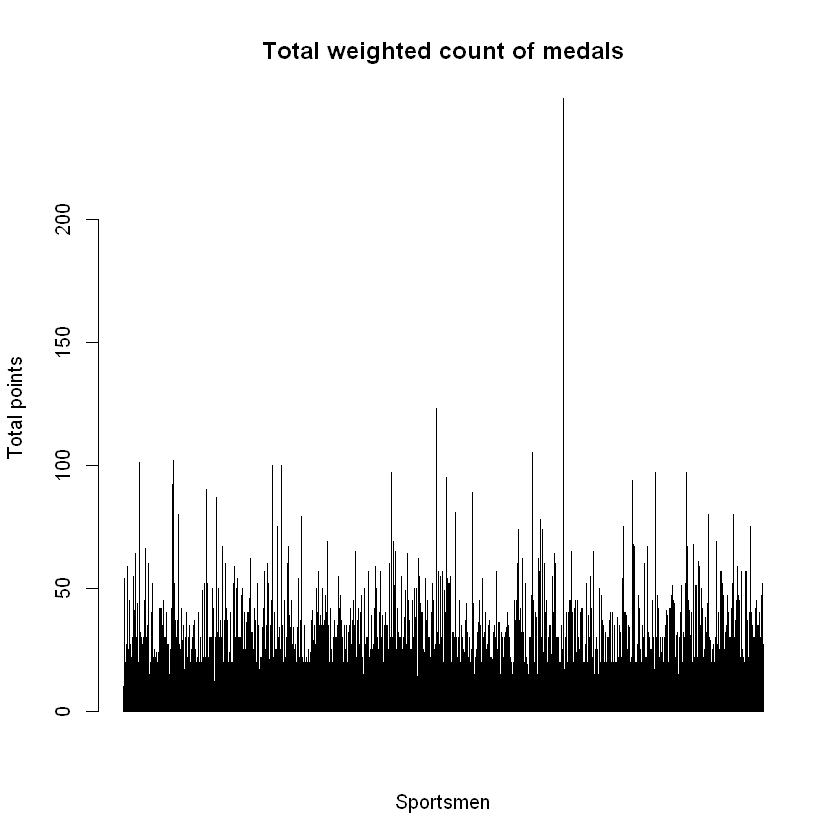

In [28]:
barplot(athletesWithSummedPoints[['Points']], 
        main='Total weighted count of medals', 
        xlab='Sportsmen',
        ylab='Total points')

Pretty amazing!  
Let's have closer look at **top 50 sportsmen**:

_now I have created a function for subsetting top X sportsmen_    

In [29]:
topSportsmen <- function(x){
    topSportsmenUnsorted <- unique(merge(
    head(athletesWithSummedPoints[order(athletesWithSummedPoints$Points, decreasing=TRUE),],x), 
    athletesData, 
    all.x=TRUE)[c('Name','Points')])

    topSportsmen <- topSportsmenUnsorted[order(topSportsmenUnsorted$Points, decreasing=TRUE),]
    row.names(topSportsmen) <- paste('Top', 1:x)
    return(topSportsmen)
}

_same, as several cells above, only for top 50, not for all_

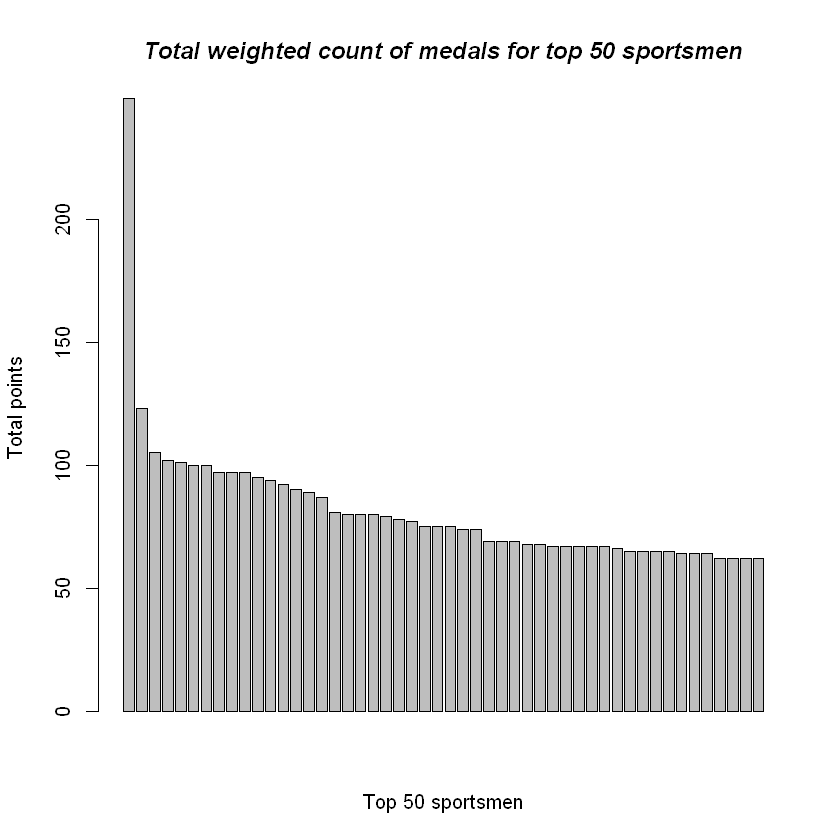

In [30]:
bp <- barplot(topSportsmen(50)$Points, 
        main='Total weighted count of medals for top 50 sportsmen', 
        font.main = 4, 
        xlab='Top 50 sportsmen', 
        ylab='Total points')

And finally, let's take a look on **top 10 sportsmen** and visualize their succeses!

_I have used function for subsetting top X sportsmen again_  
_after that I plot a barchart, but now with names_
_code for showing their names was inspired by StachOverflow discussions, link is below_

_here is printout for One column selection task_

,Name,Points
Top 1,"Michael Fred Phelps, II",249
Top 2,Larysa Semenivna Latynina (Diriy-),123
Top 3,Paavo Johannes Nurmi,105
Top 4,Ole Einar Bjrndalen,102
Top 5,Nikolay Yefimovich Andrianov,101
Top 6,"Raymond Clarence ""Ray"" Ewry",100
Top 7,Birgit Fischer-Schmidt,100
Top 8,Sawao Kato,97
Top 9,Mark Andrew Spitz,97
Top 10,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",97


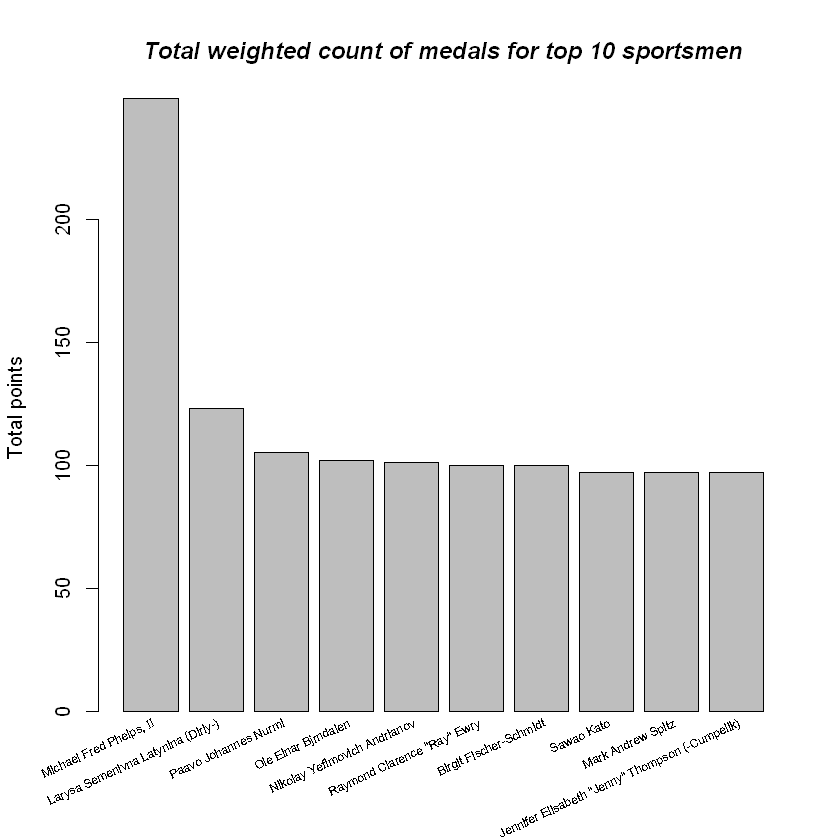

In [31]:
top10Sportsmen <- topSportsmen(10)

top10Sportsmen

bp <- barplot(top10Sportsmen$Points, 
        main='Total weighted count of medals for top 10 sportsmen', 
        font.main = 4, 
        ylab='Total points')
text(x=bp[,1], y=-2, adj=c(1, 1), top10Sportsmen[['Name']], cex=0.6, srt=25, xpd=TRUE)

#https://stackoverflow.com/questions/31979449/how-do-i-get-x-axis-labels-to-show-in-r-barplot

Michael Fred Phelps, II is like _two times better_ than even best of other participants!  

![Michael Fred Phelps, II](https://myhero.com/images/guest/g292360/hero113960/Michael-Phelps-SI-cover-shoot-SI523_TK1_002902.jpg "Michael Fred Phelps, II")  
Let's check how many medals he has total:  

_now I just count rows in the column that contains his medals_

In [32]:
cat('Aaand he has a total of', 
    length(na.omit(topAthlet[, 'Medal'])), 
    'medals out of', 
    length(topAthlet[, 'Medal']), 
    'attempts!')

Aaand he has a total of 28 medals out of 30 attempts!

(Which is confirmed by [Wikipedia](https://en.wikipedia.org/wiki/Michael_Phelps)...)

-------

He has got a total of **28 medals out of 30 attempts** for now, he has **started his sport career at the age of 15** and he is the most successful sportsmen that world knows.   
 
He is a professional swimmer and even comparing with *best of the best sportsmen* during all of those years he is ***2,5 times more successful***.    
His body measurments are same as for statically perfect candidates, exactly at the top of the densities over medalists charts.  
His age is also quite in the density interval of winning sportsmen.  
This makes him a **perfect candidate for sponsoring and close attention**!

------------


Wow!                                                           |  Amazing!
:-------------------------------------------------------------:|:-------------------------:
![Wow](https://media.giphy.com/media/vQqeT3AYg8S5O/giphy.gif)  |  ![Wow2](https://media.giphy.com/media/129fFfp0ZAMJYA/giphy.gif)

--------------------------
--------------------------
--------------------------
<a id='sport'></a>

# <span style="color:green"> Sport Selection </span>
## <span style="color:red"> Data Exploration </span>


So, which **types of sport** do we have?

_using `unique()` function to get all unique variables from one column_

In [33]:
sports <- unique(athletesData[, 'Sport'])
unique(athletesData[, 'Sport'])

[1] Basketball                Judo                     
 [3] Football                  Tug-Of-War               
 [5] Speed Skating             Cross Country Skiing     
 [7] Athletics                 Ice Hockey               
 [9] Swimming                  Badminton                
[11] Sailing                   Biathlon                 
[13] Gymnastics                Art Competitions         
[15] Alpine Skiing             Handball                 
[17] Weightlifting             Wrestling                
[19] Luge                      Water Polo               
[21] Hockey                    Rowing                   
[23] Bobsleigh                 Fencing                  
[25] Equestrianism             Shooting                 
[27] Boxing                    Taekwondo                
[29] Cycling                   Diving                   
[31] Canoeing                  Tennis                   
[33] Modern Pentathlon         Figure Skating           
[35] Golf                      Softball                 
[37] Archery                   Volleyball               
[39] Synchronized Swimming     Table Tennis             
[41] Nordic Combined           Baseball                 
[43] Rhythmic Gymnastics       Freestyle Skiing         
[45] Rugby Sevens              Trampolining             
[47] Beach Volleyball          Triathlon                
[49] Ski Jumping               Curling                  
[51] Snowboarding              Rugby                    
[53] Short Track Speed Skating Skeleton                 
[55] Lacrosse                  Polo                     
[57] Cricket                   Racquets                 
[59] Motorboating              Military Ski Patrol      
[61] Croquet                   Jeu De Paume             
[63] Roque                     Alpinism                 
[65] Basque Pelota             Aeronautics              
66 Levels: Aeronautics Alpine Skiing Alpinism Archery ... Wrestling

Let's check for **how many times each type of sport was played**.

_here I am creating a dataframe with sports and number of games_

In [34]:
contTableSports <- as.data.frame(table(athletesData[c('Sport','Event','Year')]))
sportFreq <- data.frame('Sport'=c(), 'Games'=c())
for(sport in sports){
    sportFreq <- rbind(sportFreq, 
                       data.frame('Sport'=sport,
                                   'Games'=
                                  sum(contTableSports[contTableSports['Sport']==sport, 'Freq',])))
}

 _I got permutations with function `order()`, applied them to dataframe, which contains Sports and their Frequencies, and then I have shown top 10 values_

In [35]:
topGamesByPlays <- head(sportFreq[order(sportFreq['Games'], decreasing=TRUE),], 10)
row.names(topGamesByPlays) <- paste('Top', 1:10)
topGamesByPlays

,Sport,Games
Top 1,Athletics,38624
Top 2,Gymnastics,26707
Top 3,Swimming,23195
Top 4,Shooting,11448
Top 5,Cycling,10859
Top 6,Fencing,10735
Top 7,Rowing,10595
Top 8,Cross Country Skiing,9133
Top 9,Alpine Skiing,8829
Top 10,Wrestling,7154


Next, let's find **number of participating teams** for each type of the sport.

_here I am creating a dataframe with sports and number of participated teams_

In [36]:
sportTeamContTable <- as.data.frame(table(athletesData[c('Sport','Team')]))
sportTeamFreq <- data.frame('Sport'=c(), 'Participated Teams'=c())

for(sport in sports){
    sportTeamFreq <- rbind(sportTeamFreq, 
                       data.frame('Sport'=sport,
                                   'Participated Teams'=
                                  sum(sportTeamContTable[sportTeamContTable['Sport']==sport, 'Freq',])))
}
colnames(sportTeamFreq) <- c('Sport', 'Participated Teams') 
# there is a bug, actually, without this I was getting `Participated.Teams` 

_and here we are displaying data_

In [37]:
topGamesByTeams <- head(sportTeamFreq[order(sportTeamFreq['Participated Teams'], decreasing=TRUE),],10)
rownames(topGamesByTeams) <- paste('Top', 1:10)
topGamesByTeams

,Sport,Participated Teams
Top 1,Athletics,38624
Top 2,Gymnastics,26707
Top 3,Swimming,23195
Top 4,Shooting,11448
Top 5,Cycling,10859
Top 6,Fencing,10735
Top 7,Rowing,10595
Top 8,Cross Country Skiing,9133
Top 9,Alpine Skiing,8829
Top 10,Wrestling,7154


Let's now get **how many times each type of sport was played** for games that were played **after 2000**.   

_same, as in cells above, but now with one additional filter_

In [38]:
sportTeamContTableLastYears <- as.data.frame(table(athletesData[athletesData['Year']>1999,][c('Sport','Team')]))
sportTeamFreqLastYears <- data.frame('Sport'=c(), 'Freq'=c())
for(sport in sports){
    sportTeamFreqLastYears <- rbind(sportTeamFreqLastYears, 
                       data.frame('Sport'=sport,
                                   'Freq'=sum(sportTeamContTableLastYears[
                                       sportTeamContTableLastYears['Sport']==sport,
                                       'Freq',])))
}
topGamesInLastYears <- head(sportTeamFreqLastYears[order(sportTeamFreqLastYears['Freq'], decreasing=TRUE),],10)
rownames(topGamesInLastYears) <- paste('Top', 1:10)
topGamesInLastYears

,Sport,Freq
Top 1,Athletics,11673
Top 2,Swimming,8214
Top 3,Gymnastics,5000
Top 4,Cycling,3192
Top 5,Cross Country Skiing,3076
Top 6,Shooting,2849
Top 7,Rowing,2783
Top 8,Biathlon,2631
Top 9,Alpine Skiing,2550
Top 10,Football,2225


<a id='sport_recommendations'></a>

## <span style="color:red"> Recommendations: </span>

So, as we can see, **Athletics**, **Gymnastics** and **Swimming** are the _most popular_ types of sport, as for the whole timeline and also for modern  age.  
Athletics were and still are the most popular type of the sport, almost twice as popular, as Gymnastics and Swimming.  
Gymnastics moved from second most popular to third most popular type of sport.  

However, as I already recommend to sponsor swimmer and Athletics are much more popular than Gymnastics, my **final recommendation is Athletics**.

<a id='summary'></a>

## <span style="color:red"> Summary: </span>
  
  
  
After researching this dataset next properties and dependencies were found:

* around 15% of participants got medals;
* quantity of medals is almost same;
* males participated around 2,5 times more than females;
* most of the sportsmen were between 60 and 79 kg and between 1,68 and 1,83 meters;
* Body Mass Index of most of the medalists was between 18-27; 
* most of the sportsmen were between 16 and 30 y.o., 
    * while the biggest part of participants are around 25 y.o.
* min and max ages of participant were:
    * oldest woman - 74 y.o.,
    * oldest man - 97 y.o.,
    * youngest man - 10 y.o.,
    * youngest woman - 11 y.o.
* the most successfull sportsman of all times is Michael Fred Phelps, II,
    * with a total of 28 medals
    * out of 30 attempts;
    * he is 2,5 times better than even best of other sportsmen.
* three most popular sports were Athletics, Gymnastics, Swimming,
    * but in recent time Swimming moved to the second place 
      and Gymnastics to the third place,
    * with Athletics around 1.5-2.5 times more popular than Gymnastics and Swimming.